In [5]:
import numpy as np
import os

os.environ["Q_ALCHEMY_API_KEY"] = "n6I5ypSXJeb8E1mlX71gAJ1v9RCKSb52"

In [6]:
def plot_digits(digits, labels, text, matrix_dim):
    import matplotlib.pyplot as plt

    _, axes = plt.subplots(nrows=1, ncols=len(digits), figsize=(10, 3))
    for ax, digit, label in zip(axes, digits, labels):
        ax.set_axis_off()
        image = digit[:int(matrix_dim**2)].reshape(matrix_dim, matrix_dim)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='none')
        ax.set_title(label)

    plt.show()

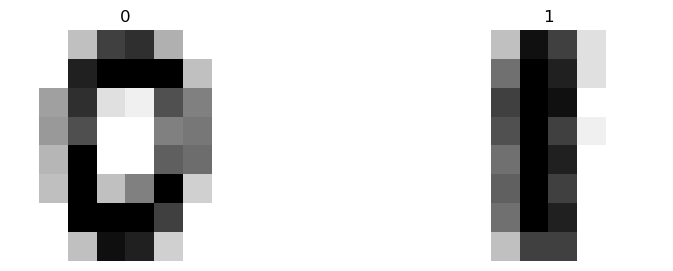

array([0.        , 0.        , 0.05987335, 0.17962004, 0.19458837,
       0.07484168, 0.        , 0.        , 0.        , 0.        ,
       0.20955671, 0.23949338, 0.23949338, 0.23949338, 0.05987335,
       0.        , 0.        , 0.08981002, 0.19458837, 0.02993667,
       0.01496834, 0.1646517 , 0.11974669, 0.        , 0.        ,
       0.09579735, 0.1646517 , 0.        , 0.        , 0.11974669,
       0.1277298 , 0.        , 0.        , 0.06842668, 0.23949338,
       0.        , 0.        , 0.14968337, 0.13685336, 0.        ,
       0.        , 0.05987335, 0.23949338, 0.05987335, 0.11974669,
       0.23949338, 0.04490501, 0.        , 0.        , 0.        ,
       0.23949338, 0.23949338, 0.23949338, 0.17962004, 0.        ,
       0.        , 0.        , 0.        , 0.05987335, 0.22452505,
       0.20955671, 0.04490501, 0.        , 0.        ])

In [7]:
from qclib.machine_learning.datasets import digits

sample_total, training_input, test_input, class_labels = digits.load(
    classes=[0, 1], training_size=1, test_size=1
)
zero = training_input[0][0]
one = training_input[1][0]
plot_digits([zero, one], [0, 1], "test", 8)
zero

# Looking at the 0

In [8]:
import sys
sys.path.append('..')
from q_alchemy.qiskit import QAlchemyInitialize

sp_org = QAlchemyInitialize(zero, opt_params={'max_fidelity_loss':0.0})
sp_org.definition.draw(fold=-1)

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                                                                                                                                                                                  │
q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                                                                                                                                                                                  │
q_2: ┤2                                                                                                                                                                                                                                                                                                                                                                                 ├
     │  LRSP(0,0,0.059873,0.17962,0.19459,0.074842,0,0,0,0,0.20956,0.23949,0.23949,0.23949,0.059873,0,0,0.08981,0.19459,0.029937,0.014968,0.16465,0.11975,0,0,0.095797,0.16465,0,0,0.11975,0.12773,0,0,0.068427,0.23949,0,0,0.14968,0.13685,0,0,0.059873,0.23949,0.059873,0.11975,0.23949,0.044905,0,0,0,0.23949,0.23949,0.23949,0.17962,0,0,0,0,0.059873,0.22453,0.20956,0.044905,0,0) │
q_3: ┤3                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                                                                                                                                                                                  │
q_4: ┤4                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                           

In [10]:
from qiskit import transpile

qc = transpile(sp_org.definition, basis_gates=["id", "rx", "ry", "rz", "cx"])
qc.draw(fold=-1)

global phase: 11π/8
     ┌──────────────┐                 ┌──────────────┐┌────────┐     ┌────────┐┌─────────────┐                  ┌─────────────┐   ┌────────┐                     ┌─────────┐  ┌──────────────┐                      ┌──────────┐ ┌────────────┐                                                              ┌─────────────┐ ┌────────────┐┌─────────────┐       ┌─────────┐  ┌────────────┐                    ┌────────────┐┌──────────────┐                                                     ┌────────────┐  ┌─────────┐    ┌────────────┐                                              ┌─────────────┐   ┌────────┐                                ┌─────────┐  ┌─────────────┐                                  ┌──────────────┐ ┌────────────┐                              
q_0: ┤ Ry(0.020625) ├────────■────────┤ Ry(-0.91003) ├┤ Rz(-π) ├──■──┤ Rz(-π) ├┤ Ry(-1.3986) ├───────────────■──┤ Rx(-0.8454) ├───┤ Rz(-π) ├─────────────────■───┤ Rz(π/2) ├──┤ Ry(-0.16027) ├───────────────────■──┤ Rz(-π/2) ├─┤ Ry(3.0733) ├──■────────────────────────────────────────────────────────■──┤ Rz(-1.5881) ├─┤ Ry(1.0371) ├┤ Rz(-3.1076) ├──■────┤ Rz(π/2) ├──┤ Ry(2.5731) ├────────────────■───┤ Rx(1.8264) ├┤ Rz(-0.57798) ├─────────────────■───────────────────────────■───────┤ Rz(2.3932) ├──┤ Ry(π/2) ├────┤ Rz(1.2902) ├──────────────────────────────────────■───────┤ Rx(-1.4305) ├───┤ Rz(-π) ├───────────────────────■────────┤ Rz(π/2) ├──┤ Ry(0.57086) ├─────────────────────────■────────┤ Rz(-0.52313) ├─┤ Ry(1.5091) ├──────────────────────────────
     └──────────────┘      ┌─┴─┐      ├──────────────┤├────────┤  │  └────────┘└┬────────────┤ ┌──────────┐┌─┴─┐└┬───────────┬┘ ┌─┴────────┴─┐┌───────────┐┌─┴─┐┌┴─────────┴─┐└┬────────────┬┘┌───────────────┐┌─┴─┐├──────────┤┌┴────────────┤  │                        ┌────────────┐  ┌────────────┐  │  └┬────────────┤ └────────────┘└─────────────┘┌─┴─┐ ┌┴─────────┴─┐├────────────┤┌────────────┐┌─┴─┐ ├────────────┤└┬────────────┬┘ ┌────────────┐  │                           │       └────────────┘  └─────────┘   ┌┴────────────┤ ┌────────────┐┌──────────────┐     ┌─┴─┐     └┬───────────┬┘ ┌─┴────────┴─┐ ┌───────────┐     ┌─┴─┐     ┌┴─────────┴─┐└┬────────────┤┌───────────────┐      ┌─┴─┐      └┬────────────┬┘┌┴────────────┤ ┌────────────┐               
q_1: ──────────────────────┤ X ├──────┤ Ry(-0.25665) ├┤ Rz(-π) ├──┼──────■──────┤ Ry(3.0758) ├─┤ Rz(-π/2) ├┤ X ├─┤ Rz(2.998) ├──┤ Ry(1.5499) ├┤ Rz(2.998) ├┤ X ├┤ Rz(1.7175) ├─┤ Ry(1.4272) ├─┤ Rz(-0.021138) ├┤ X ├┤ Rz(-π/2) ├┤ Ry(-2.6496) ├──┼───────────────────■────┤ Rz(1.4318) ├──┤ Ry(1.5461) ├──┼───┤ Rz(1.4442) ├──────────────────────────────┤ X ├─┤ Rz(-3.011) ├┤ Ry(1.5649) ├┤ Rz(1.5641) ├┤ X ├─┤ Rz(2.3137) ├─┤ Ry(1.5658) ├──┤ Rz(1.6215) ├──┼───────────────────■───────┼────────────────────────────■────────┤ Rz(-3.0847) ├─┤ Ry(1.6704) ├┤ Rz(-0.75251) ├─────┤ X ├──────┤ Rz(2.998) ├──┤ Ry(1.5499) ├─┤ Rz(2.998) ├─────┤ X ├─────┤ Rz(1.7175) ├─┤ Ry(1.4272) ├┤ Rz(-0.021138) ├──────┤ X ├───────┤ Rz(1.6944) ├─┤ Ry(0.81786) ├─┤ Rz(2.9293) ├───────────────
        ┌────────┐   ┌─────┴───┴─────┐└──────────────┘└────────┘  │      │      └────────────┘ └──────────┘└───┘ └───────────┘  └────────────┘└───────────┘└───┘└────────────┘ └────────────┘ └───────────────┘└───┘└──────────┘└─────────────┘┌─┴─┐┌─────────────┐┌─┴─┐ ┌┴────────────┴┐ └────────────┘┌─┴─┐┌┴────────────┴┐  ┌────────┐                 └───┘ └────────────┘└────────────┘└────────────┘└───┘ └────────────┘ └────────────┘  └────────────┘┌─┴─┐┌─────────────┐┌─┴─┐   ┌─┴─┐    ┌─────────────┐     ┌─┴─┐      └─────────────┘ └────────────┘└──────────────┘     └───┘      └───────────┘  └────────────┘ └───────────┘     └───┘     └────────────┘ └────────────┘└───────────────┘      └───┘       └────────────┘ └─────────────┘ └────────────┘               
q_2: ───┤ Rz(-π) ├───┤ Ry(-0.067477) ├────────────────────────────┼──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [13]:
sp_low = QAlchemyInitialize(zero, opt_params={'max_fidelity_loss':0.1})
sp_low.definition.draw(fold=-1)

┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
q_0: ───────────────────────────┤0                                                                                                                                                                                                                               ├
                                │                                                                                                                                                                                                                                │
q_1: ───────────────────────────┤1                                                                                                                                                                                                                               ├
                                │                                                                                                                                                                                                                                │
q_2: ───────────────────────────┤2                                                                                                                                                                                                                               ├
     ┌─────────────────────────┐│  LRSP(0,0,-0.20105,-0.30907,-0.31975,-0.23435,-0.045245,0,0,-0.13644,-0.26319,-0.021349,-0.010674,-0.20791,-0.18192,0,0,-0.094042,-0.35177,-0.045245,-0.09049,-0.28772,-0.13153,0,0,0,-0.21603,-0.34046,-0.32915,-0.16203,0,0) │
q_3: ┤ LRSP(-0.68633,-0.72729) ├┤                                                                                                                                                                                                                                ├
     └─────────────────────────┘│                                                                                                                                                                                                                                │
q_4: ───────────────────────────┤3                                                                                                                                                                                                                               ├
                                │                                                                                                                                                                                                                                │
q_5: ───────────────────────────┤4                                                                                                                                                                                                                               ├
                                └────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [15]:
qc_low = transpile(sp_low.definition, basis_gates=["rx", "ry", "rz", "cx", "id"])
qc_low.draw(fold=-1)

global phase: 4.2706
      ┌────────────┐                              ┌──────────────┐┌────────┐             ┌─────────────┐  ┌────────┐                               ┌─────────┐  ┌───────────────┐                               ┌──────────┐ ┌──────────────┐                                                                                                                                                                                                                     
q_0: ─┤ Ry(1.3066) ├──────────────────────■───────┤ Ry(-0.91879) ├┤ Rz(-π) ├──────■──────┤ Rx(-1.4316) ├──┤ Rz(-π) ├──────────────────────■────────┤ Rz(π/2) ├──┤ Ry(0.0071755) ├─────────────────────■─────────┤ Rz(-π/2) ├─┤ Ry(-0.12668) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ├────────────┤  ┌─────────┐         │       └──────────────┘└────────┘    ┌─┴─┐    ├─────────────┴┐┌┴────────┤┌──────────────┐    ┌─┴─┐     ┌┴─────────┴─┐└──┬──────────┬─┘┌─────────────┐    ┌─┴─┐       ├─────────┬┘ ├─────────────┬┘                                                                                                                                                                                                                     
q_1: ─┤ Ry(-1.225) ├──┤ Rz(π/2) ├─────────┼─────────────────────────────────────┤ X ├────┤ Rz(-0.61548) ├┤ Ry(π/3) ├┤ Rz(-0.61548) ├────┤ X ├─────┤ Rz(2.5261) ├───┤ Ry(2π/3) ├──┤ Rz(-2.5261) ├────┤ X ├───────┤ Rz(π/2) ├──┤ Ry(0.35826) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      └────────────┘  └─────────┘       ┌─┴─┐       ┌──────────┐                └───┘    └──────────────┘└─────────┘└──────────────┘    └───┘     └────────────┘   └──────────┘  └─┬──────────┬┘┌───┴───┴────┐  └─────────┘  └────┬───┬────┘ ┌──────────┐┌──────────────┐┌───┐┌───────────────┐┌─────────┐┌───┐┌──────────────┐                                   ┌───┐┌──────────┐┌───────────────┐┌───┐┌──────────────┐┌─────────┐┌───┐┌─────────────┐┌────────┐
q_2: ───────────────────────────────────┤ X ├───────┤ Rz(-π/2) ├──────■─────────────────────────────────────────────────────────────────────────────────────────────────■──────────┤ Rz(-π/2) ├─┤ Ry(1.2778) ├────────────────────┤ X ├──────┤ Rx(-π/2) ├┤ Rz(-0.22154) ├┤ X ├┤ Rz(-0.091673) ├┤ Rx(π/2) ├┤ X ├┤ Ry(-0.12492) ├───────────────────────────────────┤ X ├┤ Rx(-π/2) ├┤ Rz(-0.021438) ├┤ X ├┤ Rz(0.083796) ├┤ Rx(π/2) ├┤ X ├┤ Ry(-3.0067) ├┤ Rz(-π) ├
      ┌────────────┐                    └───┘       └──────────┘      │                                                                                                 │          └──────────┘ └────────────┘                    └─┬─┘      └──────────┘└──────────────┘└─┬─┘└───────────────┘└─────────┘└─┬─┘└──────────────┘                                   └─┬─┘└──────────┘└───────────────┘└─┬─┘└──────────────┘└─────────┘└─┬─┘└─────────────┘└────────┘
q_3: ─┤ Ry(1.6287) ├──────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────┼──────────────────────────────────────┼────────────────────────────────┼───────────────────────────────────────────────────────┼─────────────────────────────────┼───────────────────────────────┼───────────────────────────
     ┌┴────────────┤┌─────────────┐ ┌────────────┐                    │                                     ┌───┐    ┌────────────┐ ┌────────────┐┌────────────┐      ┌─┴─┐      ┌─────────────┐┌────────────┐┌─────────────┐       │                                      │                                │    ┌──────────┐  ┌────────────┐┌───┐┌──────────────┐  │              

In [16]:
sp_length = len(qc.get_instructions("cx"))
sp_low_length = len(qc_low.get_instructions("cx"))

print(f"The Full SP needs {sp_length} CX gates, while the Approximated SP (0.1) needs {sp_low_length} CX gates.")

The Full SP needs 30 CX gates, while the Approximated SP (0.1) needs 14 CX gates.


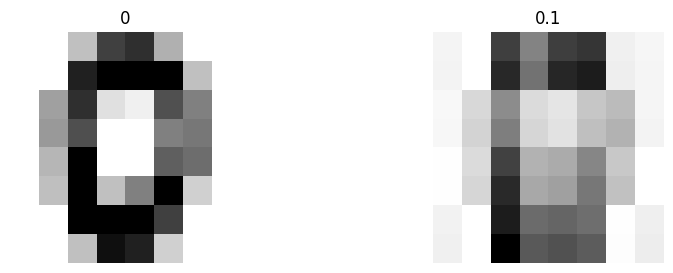

In [17]:
from qclib.util import get_state

zero_low = np.real(get_state(sp_low.definition)**2)
plot_digits([zero, zero_low], [0, 0.1], "test", 8)

# Looking at the 1

In [32]:
sp_org = QAlchemyInitialize(one, opt_params={'max_fidelity_loss':0.0})
sp_low = QAlchemyInitialize(one, opt_params={'max_fidelity_loss':0.1})

qc = transpile(sp_org.definition, basis_gates=["id", "rx", "ry", "rz", "cx"])
qc_low = transpile(sp_low.definition, basis_gates=["rx", "ry", "rz", "cx", "id"])

sp_length = len(qc.get_instructions("cx"))
sp_low_length = len(qc_low.get_instructions("cx"))

print(f"The Full SP needs {sp_length} CX gates, while the Approximated SP (0.1) needs {sp_low_length} CX gates.")

The Full SP needs 29 CX gates, while the Approximated SP (0.1) needs 21 CX gates.


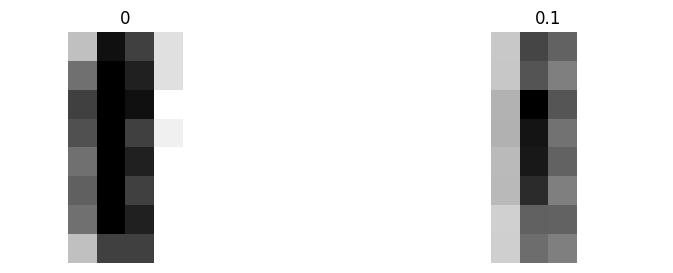

In [33]:
one_low = np.real(get_state(sp_low.definition)**2)
plot_digits([one, one_low], [0, 0.1], "test", 8)